##### Define business problem

***Predict if a customer is happy or not based on the answers they give to questions asked.***

In [1]:
# Preprocess and explore the data

import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/Tooman/Desktop/ACME-HappinessSurvey2020.csv')

#### Exploratory Data Analysis

In [2]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
print(df.shape)
print(df.size)

(126, 7)
882


In [4]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# checks for missing values in the dataset
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
df.corr()  #checks for the correlation of the variables against each other

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


<AxesSubplot:>

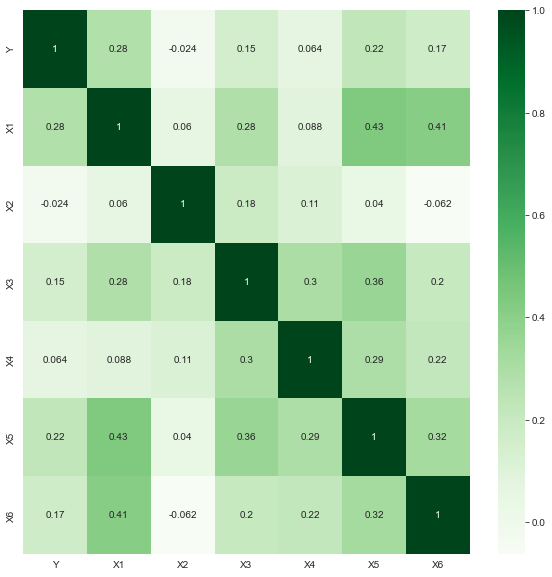

In [7]:
#plot correlation matrix heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

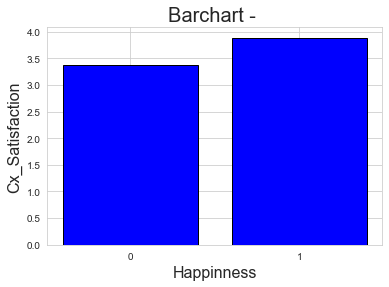

In [8]:
m = df.groupby(['Y',])['X5'].mean()
m.head(20)

y= m.tolist()
x= m.keys().tolist()
pos = np.arange(len(m))

plt.bar(pos,y,color='blue',edgecolor='black')
plt.xticks(pos, x)
plt.xlabel('Happinness', fontsize=16)
plt.ylabel('Cx_Satisfaction', fontsize=16)
plt.title('Barchart - ',fontsize=20)
plt.show()

C:\Users\Tooman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


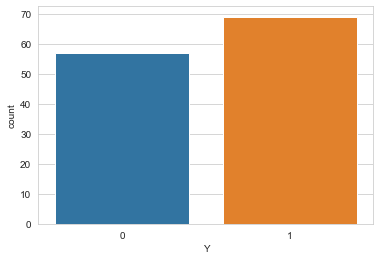

In [9]:
sns.countplot(df["Y"],orient="V")
plt.show()

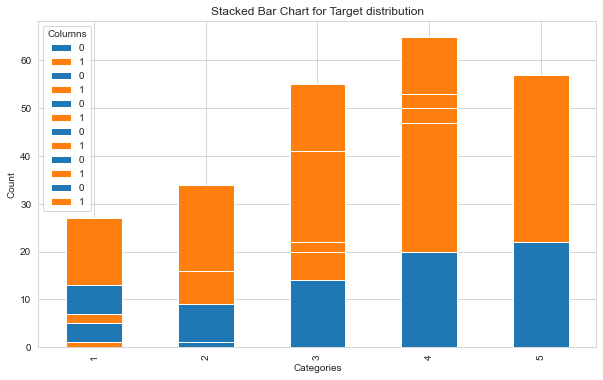

In [11]:
# Stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each column except the first one (Category)
for i, column in enumerate(df.columns[X1:]):
    df.groupby([column, 'Y']).size().unstack().plot(kind='bar', stacked=True, ax=ax, label=column)

ax.set_title('Stacked Bar Chart for Target distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Categories')
ax.legend(title='Columns')

plt.show()

In [45]:
import seaborn as sns

In [ ]:
#sns.barplot(df,x=, y= , hue=)
#df.pivot


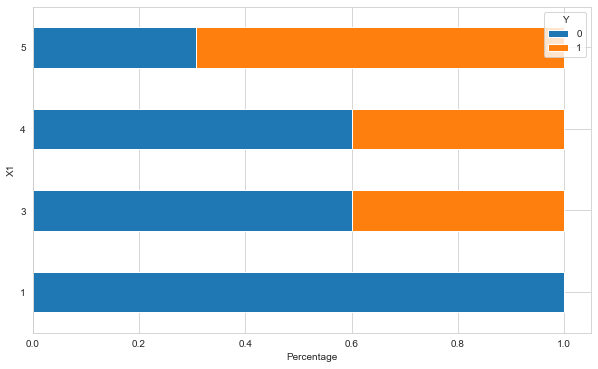

In [50]:
pvt = pd.crosstab(index=df['X1'], columns= df['Y'], normalize= 'index')
pvt.plot(kind='barh', stacked = True, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

In [ ]:
df.pivot_table('X1', index = 'X1', columns = 'Y', aggfunc = 'count')

In [ ]:
import matplotlib.pyplot as plt

# Sample data
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
true_counts = df[[20, 30, 15, 25, 10]  # Counts of True values for each feature
false_counts = [30, 20, 35, 25, 40]  # Counts of False values for each feature

# Plotting
plt.figure(figsize=(10, 6))

# Stacked bar chart
plt.bar(features, true_counts, color='green', label='True')
plt.bar(features, false_counts, bottom=true_counts, color='red', label='False')

plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Boolean Variable with 5 Features')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, palette='muted', alpha=0.7, saturation=0.8)
plt.title('Stacked Bar Chart of Boolean Variables')
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend(title='Boolean Values', labels=['False', 'True'])
plt.show()

In [ ]:
# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=melted_df, x='Feature', hue='Value', palette='viridis', hue_order=[True, False], dodge=True)
plt.title('Stacked Bar Chart of Boolean Target Variable and 5 Other Features')
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend(title='Value', loc='upper right', labels=['True', 'False'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Plot feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [15]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']


X = df.loc[:, features]
y = df.loc[:, ['Y']]

In [18]:

rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
# Fit the classifier to the data
rf_clf.fit(X, y)

# Get feature importances
importances = rf_clf.feature_importances_

C:\Users\Tooman\AppData\Local\Temp/ipykernel_4044/459469685.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X, y)


In [19]:
# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]

In [20]:
# Print feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. Feature 2 (0.1869599643584943)
2. Feature 1 (0.1807919235482739)
3. Feature 4 (0.18062222986278909)
4. Feature 0 (0.16380288659298842)
5. Feature 3 (0.15526060296215655)
6. Feature 5 (0.13256239267529774)


In [ ]:
features = df['features']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

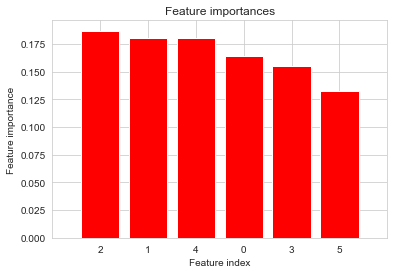

In [21]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()

In [ ]:
# Work with the best 4 features and leave out features 4 and 6

In [53]:
# Split the data into a training set and a test set
#features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
features = ['X2', 'X3', 'X5']

X = df.loc[:, features]
y = df.loc[:, ['Y']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
# normalize the data
sc = StandardScaler()
ztrain = sc.fit_transform(X_train)
ztest = sc.transform(X_test)

In [55]:
# Choose basic ML algo
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(solver='liblinear')

In [56]:
# Train the model on the training set
clf.fit(X_train, y_train)
ypred_train = clf.predict(X_train)
ypred_test = clf.predict(X_test)

C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [57]:
# Train the model on the training set on the standardised dataset
clf.fit(X_train, y_train)
ypred_train = clf.predict(ztrain)
ypred_test = clf.predict(ztest)

C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [58]:
# Evaluate the model on the test set
score = clf.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.5384615384615384


In [59]:
# Evaluate the model on the test set for the standardised dataset
score = clf.score(ztest, y_test)
print("Accuracy:", score)

Accuracy: 0.5384615384615384


In [60]:
# checking accuracy
print("Train accuracy =", clf.score(ztrain, y_train))   
print("Test accuracy  =", clf.score(ztest, y_test))     

Train accuracy = 0.48
Test accuracy  = 0.5384615384615384


In [61]:
#model = LogisticRegression()
y_pred = clf.predict(X_test)

In [62]:
# confusion matrix
#confusion_matrix(y_test, ypred)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50        14
           1       0.50      0.67      0.57        12

    accuracy                           0.54        26
   macro avg       0.55      0.55      0.54        26
weighted avg       0.55      0.54      0.53        26



In [ ]:
# Tune hyerparameters

